## Module 0 - In this jupyter notebook, WaPOR data needed for Water Productivity assessment will be  downloaded in bulk and corrected to the right unit
* Step 0a - Import modules/libraries
* Step 0b - Read geographical extent of the study area
* Step 0c - Bulk-download WaPOR data for the study area extent  

**=====================================================================================================================**
**Data layers for Water Productivity assessment:**

| No.  | WaPOR Data | Spatial resolution | Temporal resolution | Temporal coverage |
| :-: | :-: | :-: | :-: | :-: |
| 1 |Actual Evapotranspiration & interception (AETI)  | 100 m | Dekadal | 2009-2019 |
| 2  | Transpiration (T)  | 100 m | Dekadal  | 2009-2019 |
| 3  | Net Primary Production (NPP) | 100 m | Dekadal | 2009-2019 |
| 4  | Land cover classification (LCC)  | 100 m | Annual | 2009-2019 |
| 5  | Precipitation (PCP)  | 5 km | Dekadal | 2009-2019 |
| 6  | Reference Evapotranspiration (RET) | 20 km | Dekadal  | 2009-2019 |

**=====================================================================================================================**

## 1 Import modules/libraries

In [6]:
import os                     # module for interacting with the operating system
import geopandas as gpd          # module foe reading shapefile
import matplotlib.pyplot as plt # module for plotting
master_dr = os.path.split(os.getcwd())[0]
os.chdir(os.path.join(master_dr, "Modules"))
from maps import Maps
import WaPOR                  # Import local module in 'Modules' folder
WaPOR.API.version=2 #select WaPOR version
WaPOR.API.getCatalog()

Obtained saved API Token
Your WaPOR API Token is saved into: /home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Modules/WaPOR/wapor_api_token.pickle. 
 If you wish to change your API Token, please delete this file


ConnectionError: HTTPSConnectionPool(host='io.apps.fao.org', port=443): Max retries exceeded with url: /gismgr/api/v1/iam/sign-in/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7b581413c310>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

**Get WaPOR API Token: https://wapor.apps.fao.org/profile**
![title](img/Fig0.gif)

## 2 Read geographical extent of the study area

In [2]:
roi_shapefile= os.path.join(master_dr, r"Data/1Boundary/Shapefile/wheat.shp")
shape=gpd.read_file(roi_shapefile) #read shapefile
xmin,ymin,xmax,ymax=shape.total_bounds #read shapefile extent
print('Extent of study area: lonlim = [{0},{2}], latlim = [{1},{3}]'.format(xmin,ymin,xmax,ymax))

Extent of study area: lonlim = [32.92956304516667,33.003236734349294], latlim = [15.304105672350206,15.388018833341292]


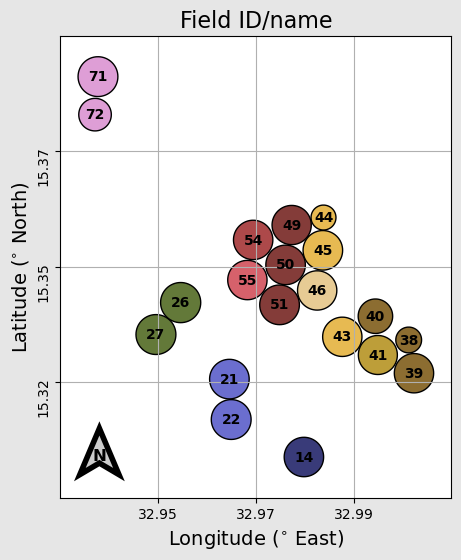

In [7]:
##plot to check shapefile
id_column = 'FID'
map = Maps()
map.main_map(shape, id_column)

## 3 Bulk-download WaPOR data for the study area extent

In [6]:
output_dir= os.path.join(master_dr, "Data/tif/download") # folder to save data

In [22]:
startdate = '2014-11-01'
enddate = '2015-03-15'

## Reference Evapotranspiration (Dekadal)

In [27]:
WaPOR.download_dekadal(output_dir, 
                       data='RET',
                       Startdate=startdate, 
                       Enddate=enddate,
                       latlim=[ymin-0.1, ymax+0.1], 
                       lonlim=[xmin-0.1, xmax+0.1],
                       level=1, 
                       )


Download WaPOR Level 1 dekadal RET data for the period 2014-11-01 till 2015-03-15
Loading WaPOR catalog from cached file: /home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Data/WAPOR.v2_dekadal_L1_RET_D'

## Precipitation (Dekadal) 

In [28]:
WaPOR.download_dekadal(output_dir, 
                       data='PCP',
                       Startdate=startdate, 
                       Enddate=enddate,
                       latlim=[ymin-0.1, ymax+0.1], 
                       lonlim=[xmin-0.1, xmax+0.1],
                       level=1, 
                       )


Download WaPOR Level 1 dekadal PCP data for the period 2014-11-01 till 2015-03-15
Loading WaPOR catalog from cached file: /home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Data/WAPOR.v2_dekadal_L1_PCP_D'

## Actual evapotranspiration & interception (Dekadal)

In [24]:
WaPOR.download_dekadal(output_dir, 
                       data='AETI',
                       Startdate=startdate, 
                       Enddate=enddate,
                       latlim=[ymin-0.1, ymax+0.1], 
                       lonlim=[xmin-0.1, xmax+0.1],
                       level=2, 
                       )


Download WaPOR Level 2 dekadal AETI data for the period 2014-11-01 till 2015-03-15
Loading WaPOR catalog from cached file: /home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Data/WAPOR.v2_dekadal_L2_AETI_D'

## Transpiration (Dekadal)

In [25]:
WaPOR.download_dekadal(output_dir, 
                       data='T',
                       Startdate=startdate, 
                       Enddate=enddate,
                       latlim=[ymin-0.1, ymax+0.1], 
                       lonlim=[xmin-0.1, xmax+0.1],
                       level=2, 
                       )


Download WaPOR Level 2 dekadal T data for the period 2014-11-01 till 2015-03-15
Loading WaPOR catalog from cached file: /home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Data/WAPOR.v2_dekadal_L2_T_D'

## Net Primary Production (Dekadal)

In [26]:
WaPOR.download_dekadal(output_dir, 
                       data='NPP',
                       Startdate=startdate, 
                       Enddate=enddate,
                       latlim=[ymin-0.1, ymax+0.1], 
                       lonlim=[xmin-0.1, xmax+0.1],
                       level=2, 
                       )


Download WaPOR Level 2 dekadal NPP data for the period 2014-11-01 till 2015-03-15
Loading WaPOR catalog from cached file: /home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Data/WAPOR.v2_dekadal_L2_NPP_D'

## Land cover classification (Annual)

In [29]:
WaPOR.download_yearly(output_dir, 
                       data='LCC',
                       Startdate=startdate, 
                       Enddate=enddate,
                       latlim=[ymin-0.1, ymax+0.1], 
                       lonlim=[xmin-0.1, xmax+0.1],
                       level=2, 
                       )


Download WaPOR Level 2 yearly LCC data for the period 2014-11-01 till 2015-03-15
Loading WaPOR catalog from cached file: /home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/home/msalah/Desktop/m salah/WaPOR Irrigation performance assessment/application/WAPORWP-master/Data/WAPOR.v2_yearly_L2_LCC_A'